In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import uniform
# import random as rand
# from scipy.stats import norm

In [2]:
def plot(X):
    plt.figure(figsize = (5,2))
    plt.hist(X, bins = 15, alpha = 0.5, label = "Stabe distribution")
    plt.legend()
    plt.show()

# a-stable distribution

In [3]:
def stable(alpha, beta, gamma, delta, n):
    Theta = np.random.uniform(-np.pi/2, np.pi/2, n)
    W = np.random.exponential(1, n)
    theta_0 = np.arctan(beta * np.tan(np.pi * alpha/2))/alpha
    if alpha != 1:
        Z = np.sin(alpha * (theta_0 + Theta))/(np.cos(alpha * theta_0) * np.cos(Theta))**(1/alpha) * (np.cos(alpha * theta_0 + (alpha - 1) * Theta) / W)**((1-alpha) / alpha)
        X = gamma * Z + delta
    else:
        Z = 2/np.pi * ((np.pi/2 + beta * Theta) * np.tan(Theta) - beta * np.log((np.pi/2 * W * np.cos(Theta)) / (np.pi/2 + beta * Theta)))
        X = gamma * Z + delta + beta * 2/np.pi * gamma * np.log(gamma)
    return X

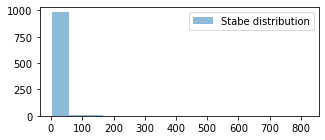

In [4]:
n = 1000
alpha = 0.9
beta = 1
gamma = 1
delta = 0

Z = stable(alpha, beta, gamma, delta, n)
plot(Z)

# a-stable vector

In [66]:
def stable_vector(Zs, gammas, ss, d, alpha):
    Xs = []
    n = len(gammas)
    for i in range(d):
        X = []
        if alpha == 1:
            for j in range(n):
                X.append(gammas[j] * (Zs[j] + 2/np.pi * np.log(gammas[j])) * ss[j][i])
            Xs.append(sum(X))
        else:
            for j in range(n):
                X.append(np.power(gammas[j], 1/alpha) * Zs[j] * ss[j][i])
            Xs.append(sum(X))
    return Xs

In [6]:
gammas = [0.25, 0.125, 0.25, 0.25, 0.125, 0.25]
ss = [[1, 0], 
      [1/2, np.sqrt(3)/2], 
      [-1/2, np.sqrt(3)/2],
      [-1, 0],
      [-1/2, -np.sqrt(3)/2],
      [1/2, -np.sqrt(3)/2]]
d = 2
alpha = 0.9

n = 10000
beta = 1
gamma = 1
delta = 0

In [7]:
Zs = [stable(alpha, beta, gamma, delta, n) for _ in gammas]
Xs = stable_vector(Zs, gammas, ss, d)

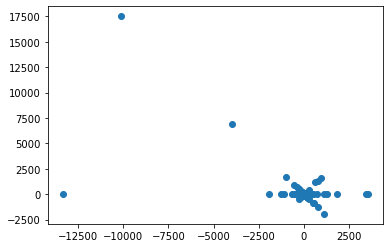

In [8]:
plt.scatter(Xs[0], Xs[1])

In [9]:
gammas = [0.1, 0.3, 0.1, 0.3, 0.1]
ss = [[1, 0], 
      [np.sqrt(3)/2, 1/2], 
      [1/2, np.sqrt(3)/2],
      [0, 1],
      [-1/2, np.sqrt(3)/2]]
d = 2
alpha = 1.6

n = 10000
beta = 1
gamma = 1
delta = 0

In [10]:
Zs = [stable(alpha, beta, gamma, delta, n) for _ in gammas]
Xs = stable_vector(Zs, gammas, ss, d)

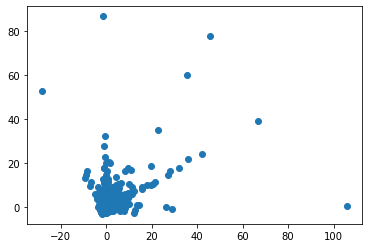

In [11]:
plt.scatter(Xs[0], Xs[1])

## Estimating spectral measure

In [64]:
gammas = [0.25, 0.125, 0.25, 0.25, 0.125, 0.25]
ss = [[1, 0], 
      [1/2, np.sqrt(3)/2], 
      [-1/2, np.sqrt(3)/2],
      [-1, 0],
      [-1/2, -np.sqrt(3)/2],
      [1/2, -np.sqrt(3)/2]]
d = 2
alpha = 0.9

n = 10000
beta = 1
gamma = 1
delta = 0

In [65]:
Zs = [stable(alpha, beta, gamma, delta, n) for _ in gammas]
Xs = stable_vector(Zs, gammas, ss, d)

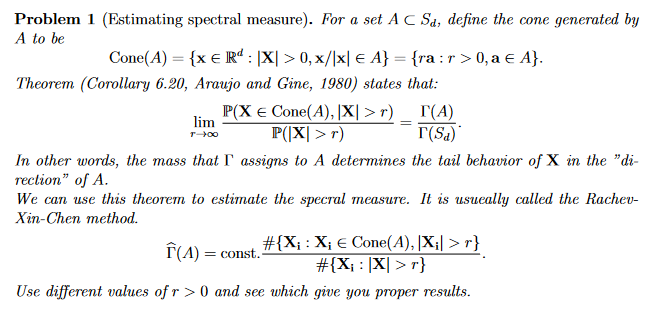

In [71]:
x = np.array([5, 0])
norm = (x[0]**2 + x[1]**2)**(1/2)
x / norm

array([1., 0.])

## Sub-Gaussian vector

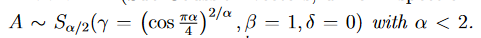

In [59]:
alpha = 1.5
d = 2
n = 10000

In [60]:
def sub_gaussian(alpha, d, n):
    beta = 1
    gamma = (np.cos(np.pi * alpha / 4))**(2/alpha)
    delta = 0
    
    A = stable(alpha/2, beta, gamma, delta, n)
    G = [np.random.normal(0, gamma, n) for _ in range(d)]
    X = A ** (1/2) * G
    
    return X

In [61]:
X = sub_gaussian(alpha, d, n)

In [62]:
X

array([[ 0.27029283, -0.07463409, -0.23602186, ..., -0.16162752,
         0.72467529,  0.07514221],
       [ 1.98805717, -0.22742393, -0.1699724 , ...,  0.55497314,
        -1.59077251,  0.49854123]])

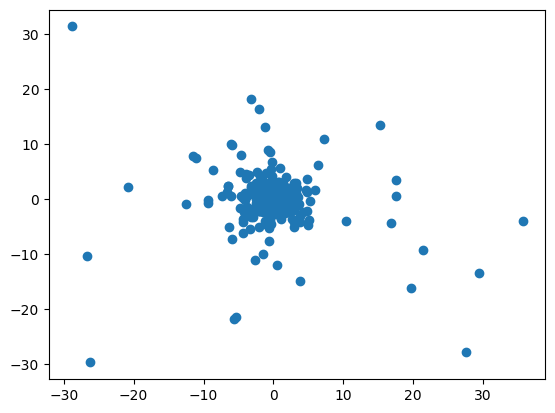

In [63]:
plt.scatter(X[0], X[1])

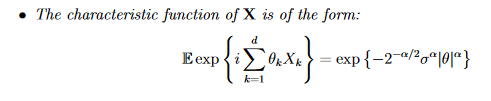

In [ ]:
t = [np.pi * k / 25 for k in np.linspace(1, K+1, K)]
cf = [np.mean(np.exp(1j * t_value * Z)) for t_value in t]

## Codifference

In [50]:
def codif(X, Y):
    cf_xy = np.mean(np.exp(1j * (X - Y)))
    cf_x = np.mean(np.exp(1j * X ))
    cf_y = np.mean(np.exp(1j * (-Y)))
    tau = np.log(np.real(cf_xy)) - np.log(np.real(cf_x)) - np.log(np.real(cf_y))
    return tau

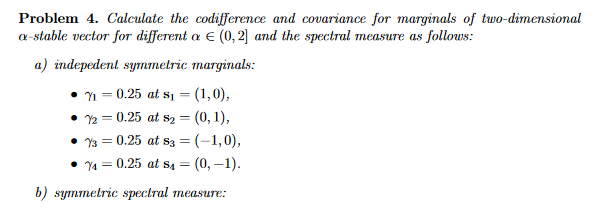

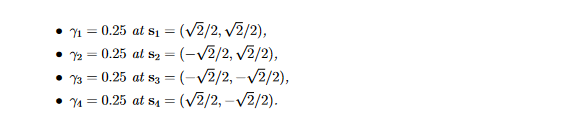

In [67]:
n = 10000
beta = 1
gamma = 1
delta = 0
d = 2
alpha = [0.2, 0.5, 0.7, 1, 1.2, 1.5, 1.7, 2]

In [68]:
gammas = [0.25, 0.25, 0.25, 0.25]
ss = [[1, 0], 
      [0, 1], 
      [-1, 0],
      [0, -1]]

In [69]:
Zs = []
for al in alpha:
    Zs.append([stable(al, beta, gamma, delta, n) for _ in gammas])
Xs = [stable_vector(Zs[i], gammas, ss, d, alpha[i]) for i in range(len(Zs))]

In [54]:
print(codif(Xs[0], Xs[1]), codif(Xs[1], Xs[0]))

0.002300949227406035 0.002300949227406035


In [84]:
for i in range(len(Xs)):
    print(f"alpha = {alpha[i]}, \tTau = {codif(Xs[i][0], Xs[i][1])}, \tCov = {np.cov(Xs[i][0], Xs[i][1])[0][1]}")

alpha = 0.2, 	Tau = -0.008376189586545901, 	Cov = 2.632284055168473e+31
alpha = 0.5, 	Tau = 0.012907403098992687, 	Cov = 17374607.718472544
alpha = 0.7, 	Tau = -0.014381407889230369, 	Cov = -352.19674612049783
alpha = 1, 	Tau = -0.008655605951917278, 	Cov = 7.145680439484242
alpha = 1.2, 	Tau = 0.0055046276867107835, 	Cov = -0.23692807553764386
alpha = 1.5, 	Tau = 0.009623020313909492, 	Cov = 0.11112346535097074
alpha = 1.7, 	Tau = 0.0060332784539226525, 	Cov = -0.013802974208523845
alpha = 2, 	Tau = -0.008462170301313354, 	Cov = -0.009774475844161998


In [55]:
gammas = [0.25, 0.25, 0.25, 0.25]
ss = [[np.sqrt(2)/2, np.sqrt(2)/2], 
      [-np.sqrt(2)/2, np.sqrt(2)/2], 
      [-np.sqrt(2)/2, -np.sqrt(2)/2],
      [np.sqrt(2)/2, -np.sqrt(2)/2]]

In [56]:
Zs = [stable(alpha, beta, gamma, delta, n) for _ in gammas]
Xs = stable_vector(Zs, gammas, ss, d)

In [57]:
print(codif(Xs[0], Xs[1]), codif(Xs[1], Xs[0]))

0.7839337922998426 0.7839337922998426


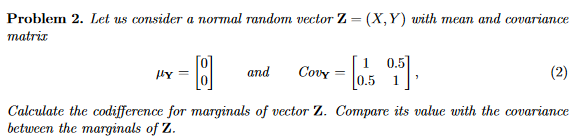

In [108]:
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
Z = np.random.multivariate_normal(mean, cov, size = n)
Z = np.transpose(Z)

In [109]:
print(codif(Z[0], Z[1]))

0.5112189028609103


In [102]:
Zs = np.random.normal(loc = 0.0, scale = 1.0, size = (2, n))

In [103]:
Zs

array([[ 0.37483533, -0.58750689, -0.55659413, ...,  0.4481782 ,
         0.22443176,  0.69741069],
       [ 0.58114406,  0.20506173, -0.20079512, ...,  0.0382301 ,
         1.36179912, -1.34339441]])

In [105]:
codif(Zs[0], Zs[1])

0.01058801526717229

In [29]:
def codifference(X, Y):
#     tau = 0
    t = np.ones(len(X))
    cf_xy = [np.mean(np.exp(1j * t_value * (X - Y))) for t_value in t]
    cf_x = [np.mean(np.exp(1j * t_value * X)) for t_value in t]
    cf_y = [np.mean(np.exp(1j * t_value * (-Y))) for t_value in t]
    tau = np.log(cf_xy) - np.log(cf_x) - np.log(cf_y)
    return tau

In [30]:
codifference(Xs[0], Xs[1])

array([0.28167508+0.02225837j, 0.28167508+0.02225837j,
       0.28167508+0.02225837j, ..., 0.28167508+0.02225837j,
       0.28167508+0.02225837j, 0.28167508+0.02225837j])

In [31]:
codifference(Xs[1], Xs[0])

array([0.28167508-0.02225837j, 0.28167508-0.02225837j,
       0.28167508-0.02225837j, ..., 0.28167508-0.02225837j,
       0.28167508-0.02225837j, 0.28167508-0.02225837j])